In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

In [4]:
print(os.listdir('C:/Users/Saransh/Desktop/Class PPT/ADL Project/dataset'))

['Thumbs.db', 'train', 'val']


In [5]:
path = 'C:/Users/Saransh/Desktop/Class PPT/ADL Project/dataset/train'

In [6]:
data = 'C:/Users/Saransh/Desktop/Class PPT/ADL Project/dataset/train'

In [7]:
print('number of images in total - ',len(os.listdir(data)))

number of images in total -  996


In [8]:
index = pd.read_csv('C:/Users/Saransh/Desktop/Class PPT/ADL Project/trainlabels.csv')
print('number of images in total - ',len(index))

number of images in total -  1427


In [9]:
index['image_name'] = [i+".jpeg" for i in index['image'].values]
index['level_binary'] = [i for i in index['level'].values]

for i in range(len(index.level)):
    if index['level'][i] == 0:
        index['level_binary'][i] = 0
    else:
        index['level_binary'][i] = 1
    
index.head(10)

,image,level,image_name,level_binary
0,84_left,0,84_left.jpeg,0
1,84_right,0,84_right.jpeg,0
2,95_left,0,95_left.jpeg,0
3,95_right,0,95_right.jpeg,0
4,99_left,3,99_left.jpeg,1
5,99_right,3,99_right.jpeg,1
6,842_left,0,842_left.jpeg,0
7,842_right,0,842_right.jpeg,0
8,844_left,0,844_left.jpeg,0
9,844_right,1,844_right.jpeg,1


In [10]:
from sklearn.model_selection import train_test_split

train1, val = train_test_split(index, test_size=0.2)
train, test = train_test_split(train1, test_size=0.25)

(1212,) (1212,) (215,) (215,)
1126     9668_left
1047    9587_right
1176     9717_left
94        953_left
717     9131_right
           ...    
1256     9807_left
547     8893_right
1374     9947_left
1359    9930_right
939     9450_right
Name: image, Length: 1212, dtype: object
           image  level       image_name  level_binary
1073  9614_right      0  9614_right.jpeg             0
884    9351_left      2   9351_left.jpeg             1
1143  9688_right      0  9688_right.jpeg             0
876    9340_left      0   9340_left.jpeg             0
1041  9578_right      0  9578_right.jpeg             0
...          ...    ...              ...           ...
1222   9777_left      0   9777_left.jpeg             0
1064   9603_left      0   9603_left.jpeg             0
273   8569_right      0  8569_right.jpeg             0
315   8627_right      0  8627_right.jpeg             0
252    8543_left      0   8543_left.jpeg             0

[855 rows x 4 columns]


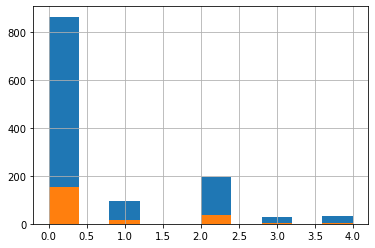

In [11]:
x = index['image']
y = index['level']
#x,y = shuffle(x,y)

train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size=0.15,stratify=y)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
train_y.hist()
valid_y.hist()
print(train_x)
print(train)

(855, 4) (286, 4) (286, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D68E439610>,
      dtype=object)

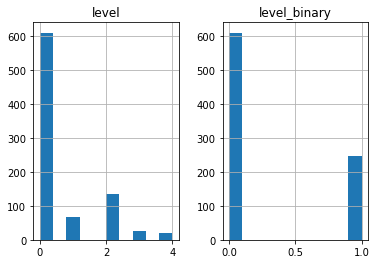

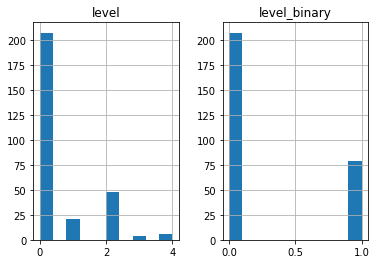

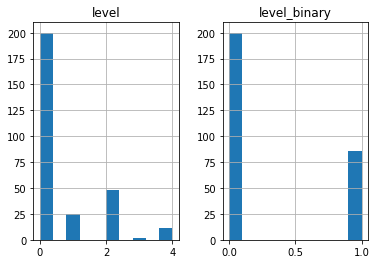

In [12]:
print(train.shape, val.shape, test.shape)
train.hist()
val.hist()
test.hist()

In [13]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

In [14]:
train_dir = 'C:/Users/Saransh/Desktop/Class PPT/ADL Project/dataset'
val_dir = 'C:/Users/Saransh/Desktop/Class PPT/ADL Project/dataset'
test_dir='C:/Users/Saransh/Desktop/Class PPT/ADL Project/dataset'

In [15]:
trainImagedata =train_generator.flow_from_directory(train_dir,
                                                    target_size=(128, 128),
                                                    batch_size=1,
                                                    class_mode='binary')
validationImagedata = validation_generator.flow_from_directory(val_dir,
                                                              target_size=(128, 128),
                                                               batch_size=1,
                                                               class_mode='binary')
testImagedata = test_generator.flow_from_directory(test_dir,target_size=(128,128),batch_size=1,class_mode='binary')

Found 1427 images belonging to 2 classes.
Found 1427 images belonging to 2 classes.
Found 1427 images belonging to 2 classes.


In [16]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(128,128,3),activation='relu',padding='same',strides=(1,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',strides=(1,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(x=trainImagedata,validation_data=validationImagedata,epochs=7,
                    steps_per_epoch=len(trainImagedata.filenames)/(trainImagedata.batch_size),
                    validation_steps=len(trainImagedata.filenames)/(trainImagedata.batch_size))

Epoch 1/7
1427/1427 [==============================] - 629s 440ms/step - loss: 0.6721 - accuracy: 0.6998 - val_loss: 0.6291 - val_accuracy: 0.6973
Epoch 2/7
1427/1427 [==============================] - 616s 432ms/step - loss: 0.6245 - accuracy: 0.6923 - val_loss: 0.6171 - val_accuracy: 0.6973
Epoch 3/7
1427/1427 [==============================] - 617s 432ms/step - loss: 0.6233 - accuracy: 0.6932 - val_loss: 0.6104 - val_accuracy: 0.6973
Epoch 4/7
1427/1427 [==============================] - 617s 433ms/step - loss: 0.6260 - accuracy: 0.6876 - val_loss: 0.6091 - val_accuracy: 0.6987
Epoch 5/7
 903/1427 [=================>............] - ETA: 2:05 - loss: 0.6254 - accuracy: 0.6959

KeyboardInterrupt: 